In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import json
import re
import seaborn as sns
import geopandas as gpd

import requests
from bs4 import BeautifulSoup  


%matplotlib inline

BLEACHING EVENTS

In [88]:
#Importing world wide bleaching events DF (wbe = world bleaching events)
#Initially imported bleaching events from world and regions, then filtered for world events only.. will come back to regions
wbe = pd.read_csv('coral-bleaching-events.csv')
wbe.columns = ['Entity', 'Code', 'Year', 'Moderate_bleaching', 'Severe_bleaching']
world_events = wbe[wbe['Entity'] == 'World']
world_events.head()

,Entity,Code,Year,Moderate_bleaching,Severe_bleaching
148,World,OWID_WRL,1980,5,0
149,World,OWID_WRL,1981,2,0
150,World,OWID_WRL,1982,1,0
151,World,OWID_WRL,1983,8,14
152,World,OWID_WRL,1984,1,1


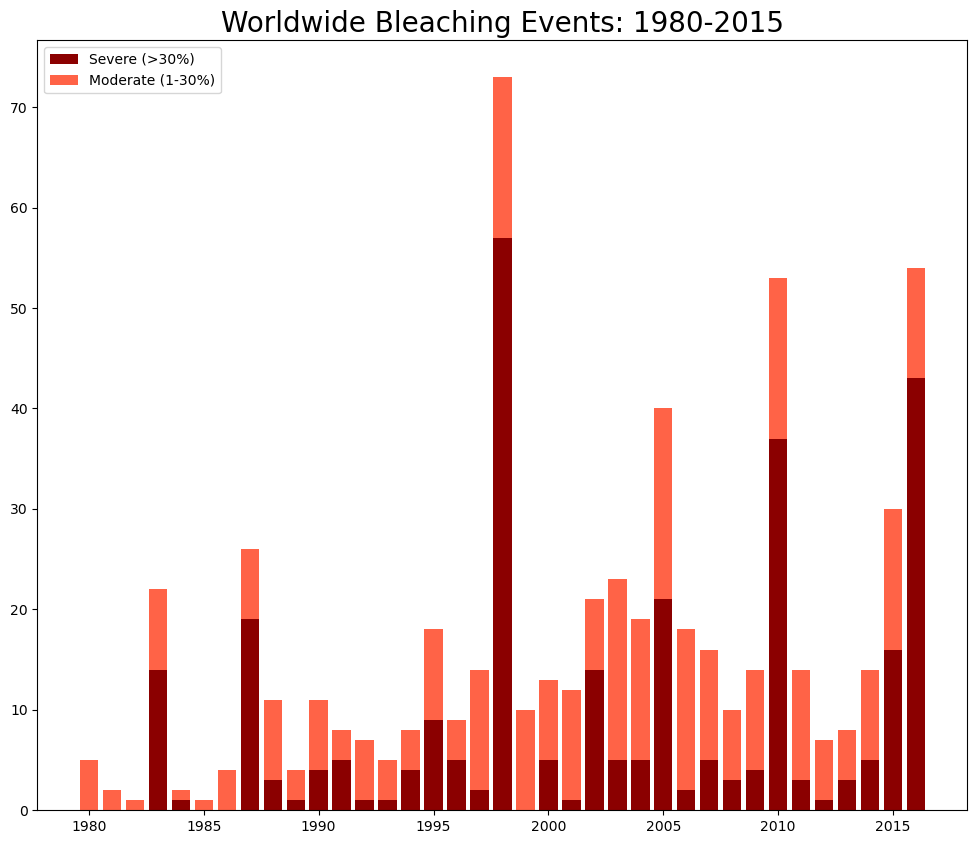

In [89]:
#Plotting severe and moderate bleaching events worldwide. 
#WHAT HAPPENED TO MY LEGEND?? 

plt.style.use('default')
plt.figure(figsize=(12,10))

plt.bar(world_events.Year, world_events.Severe_bleaching,
label ='Severe (>30%)', color="darkred")

plt.bar(world_events.Year, world_events.Moderate_bleaching,
bottom=world_events.Severe_bleaching,
label='Moderate (1-30%)', color="tomato")

plt.title('Worldwide Bleaching Events: 1980-2015', fontsize=20)
plt.legend(loc='upper left')
plt.savefig('world_bleaching_events.png')

In [90]:
#plotting to see info JUST ON AUSTRALASIA AND PACIFIC .. THIS DATA IS FROM 1980-2016 
ausasia = wbe[wbe['Entity'] == 'Australasia']
pacific = world_events = wbe[wbe['Entity'] == 'Pacific']
merge = pd.merge(ausasia, pacific, how='left', on='Year')
merge.head()

,Entity_x,Code_x,Year,Moderate_bleaching_x,Severe_bleaching_x,Entity_y,Code_y,Moderate_bleaching_y,Severe_bleaching_y
0,Australasia,NaN,1980,3,0,Pacific,NaN,0,0
1,Australasia,NaN,1981,1,0,Pacific,NaN,0,0
2,Australasia,NaN,1982,0,0,Pacific,NaN,0,0
3,Australasia,NaN,1983,3,1,Pacific,NaN,1,5
4,Australasia,NaN,1984,1,0,Pacific,NaN,0,1


COMPARING MODERATE BLEACHING EVENTS IN PACIFIC OCEAN TO AUSTRALASIA REGIONAL WATERS

Text(0.5, 1.0, 'Pacific Moderate Bleaching')

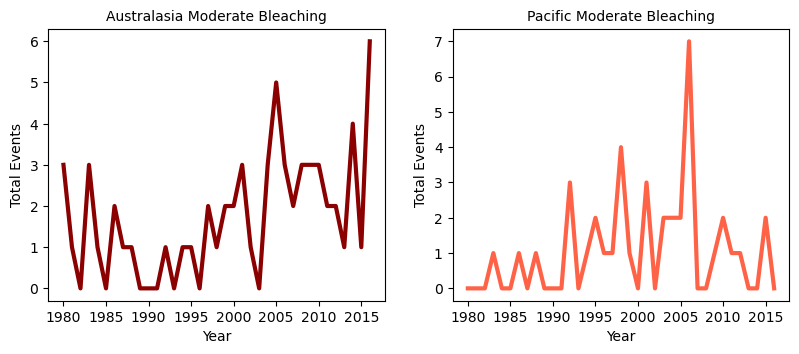

In [91]:
#figure out how to clean this up a bit .. 

plt.figure(figsize=(20,12))
#plt.subplot(1,2,1)
plt.subplot(3,4,1)
sns.lineplot(x='Year',y='Moderate_bleaching_x', data=merge, linewidth=3, color="darkred")
plt.ylabel('Total Events')
plt.title('Australasia Moderate Bleaching', fontsize=10)

#plt.subplot(1,2,2)
plt.subplot(3,4,2)
sns.lineplot(x='Year',y='Moderate_bleaching_y', data=merge, linewidth=3, color="tomato")
plt.ylabel('Total Events')
plt.title('Pacific Moderate Bleaching', fontsize=10)


COMPARING SEVERE BLEACHING EVENTS IN PACIFIC OCEAN TO AUSTRALASIA REGIONAL WATERS

Text(0.5, 1.0, 'Pacific Severe Bleaching')

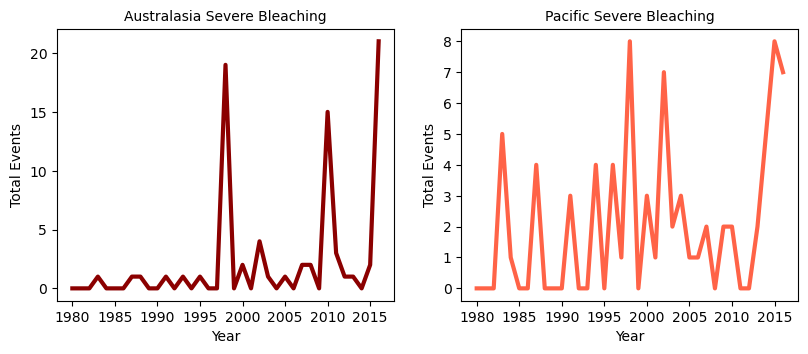

In [92]:
#figure out how to clean this up a bit.. 
plt.figure(figsize=(20,12))
#plt.subplot(1,2,1)
plt.subplot(3,4,1)
sns.lineplot(x='Year',y='Severe_bleaching_x', data=merge, linewidth=3, color="darkred")
plt.ylabel('Total Events')
plt.title('Australasia Severe Bleaching', fontsize=10)

#plt.subplot(1,2,2)
plt.subplot(3,4,2)
sns.lineplot(x='Year',y='Severe_bleaching_y', data=merge, linewidth=3, color="tomato")
plt.ylabel('Total Events')
plt.title('Pacific Severe Bleaching', fontsize=10)


In [93]:
#Importing bleaching events cause by ENSO Cycle - El Nino Southern Oscillation (bee = bleaching events el nino)
bee = pd.read_csv('bleaching-events-enso.csv')
bee.head()

,Entity,Code,Year,Total bleaching events
0,El Nino,NaN,1980,0
1,El Nino,NaN,1981,0
2,El Nino,NaN,1982,1
3,El Nino,NaN,1983,22
4,El Nino,NaN,1984,0


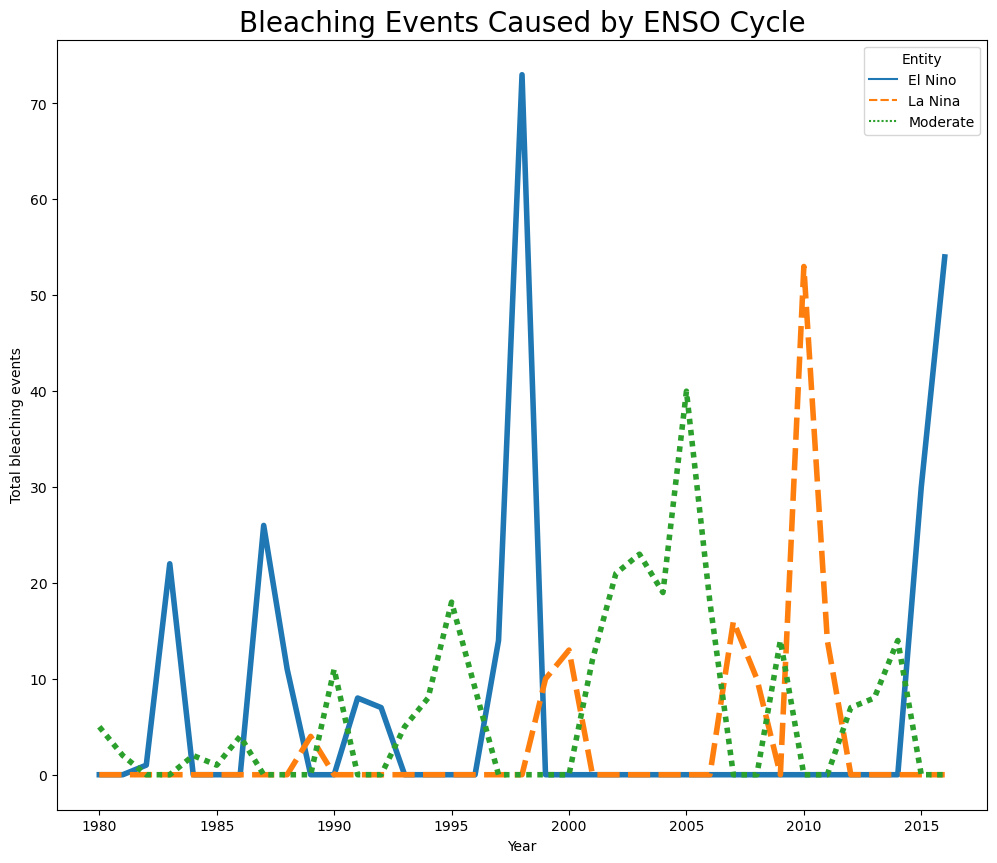

In [94]:
#plotting bleaching events caused by ENSO cycle
plt.figure(figsize=(12,10))
sns.lineplot(data=bee, x="Year", y="Total bleaching events", hue="Entity", style="Entity", linewidth=4)
plt.title('Bleaching Events Caused by ENSO Cycle', fontsize=20)
plt.savefig('ENSO_bleaching_events.png')

In [95]:
#Importing SEVERE bleaching events caused by ENSO cycle - (sbee = severe bleaching events el nino)
#also renamed columns to get rid of greater than sign and perc sign for cleaner object names
sbee = pd.read_csv('severe-bleaching-events-enso.csv')
sbee = sbee.rename(columns={'Severe bleaching events (>30% bleached)': 'Severe_bleaching'})
sbee.head()

,Entity,Code,Year,Severe_bleaching
0,El Nino,NaN,1980,0
1,El Nino,NaN,1981,0
2,El Nino,NaN,1982,0
3,El Nino,NaN,1983,14
4,El Nino,NaN,1984,0


Text(0.5, 1.0, 'Severe Bleaching Events Caused by ENSO Cycle')

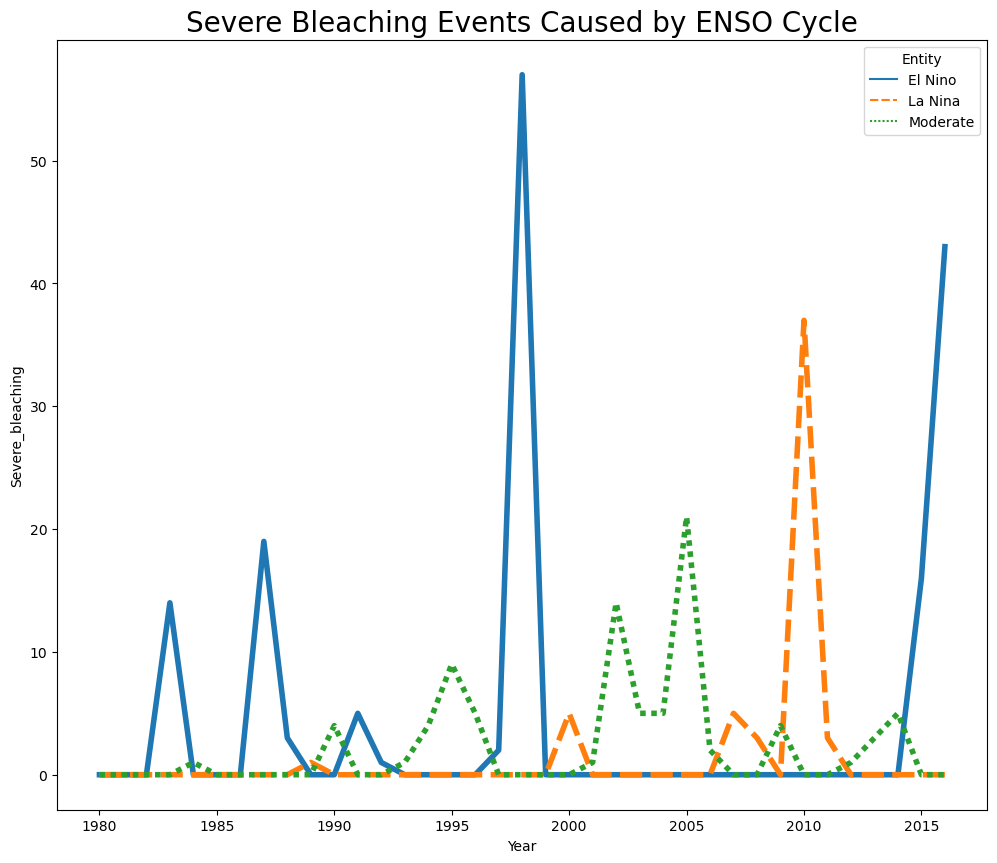

In [96]:
#plotting SEVERE bleaching events caused by ENSO cycle
plt.figure(figsize=(12,10))
sns.lineplot(data=sbee, x="Year", y="Severe_bleaching", hue="Entity", style="Entity", linewidth=4)
plt.title('Severe Bleaching Events Caused by ENSO Cycle', fontsize=20)

GLOBAL WARMING DATA

This graph shows how the average surface temperature of the world’s oceans has changed since 1880. This graph uses the 1971 to 2000 average as a baseline for depicting change. Choosing a different baseline period would not change the shape of the data over time. The shaded band shows the range of uncertainty in the data, based on the number of measurements collected and the precision of the methods used.

In [97]:
#Importing sea surface temp data .. reference is USEPA
sea_surf_temp = pd.read_csv('sea-surface-temp.csv')
sea_surf_temp.columns = ['year', 'annual_anomaly', 'lower_95_perc_confidence_interval', 'upper_95_perc_confidence_level']
sea_surf_temp.head()

,year,annual_anomaly,lower_95_perc_confidence_interval,upper_95_perc_confidence_level
0,1880,-0.211848,-0.420,-0.628152
1,1881,-0.128904,-0.330,-0.531096
2,1882,-0.150432,-0.348,-0.545568
3,1883,-0.261960,-0.456,-0.650040
4,1884,-0.373848,-0.582,-0.790152


<Figure size 1200x1000 with 0 Axes>

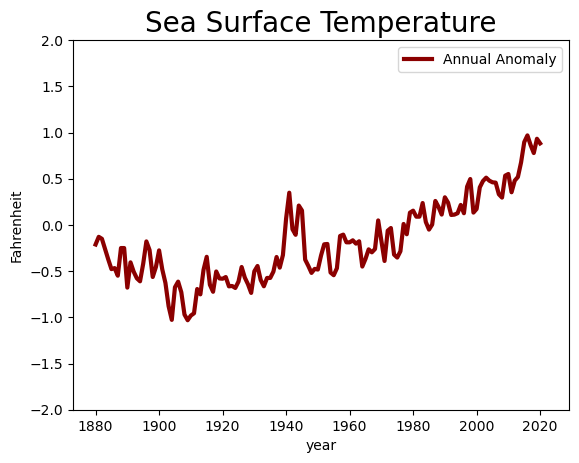

In [98]:
#reference: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature
#plotting sea surface temperature across years
#come back to this to figure out why y axis isn't cooperating as it was before
plt.figure(figsize=(12,10))
sea_surf_temp.plot(x='year', y = 'annual_anomaly', label='Annual Anomaly',linewidth=3, color="darkred")
plt.ylim((-2, 2))
plt.title('Sea Surface Temperature', fontsize=20)
plt.ylabel('Fahrenheit',fontsize=10)
plt.savefig('sea_surface_temp.png')

In [99]:
#Importing Ocean Heat DF. Different agencies results, US, JAPAN, AUSTRALIA, CHINA
ocean_heat = pd.read_csv('ocean-heat.csv')
ocean_heat.head()

,Year,CSIRO,IAP,MRI/JMA,NOAA
0,1955,NaN,-7.567433,-9.497333,-3.437233
1,1956,NaN,-6.933433,-7.897333,-2.844233
2,1957,NaN,-6.810433,-8.947333,-4.849233
3,1958,NaN,-2.275433,-5.707333,-1.769233
4,1959,NaN,-5.154433,-7.347333,-2.425233


<Figure size 1200x1000 with 0 Axes>

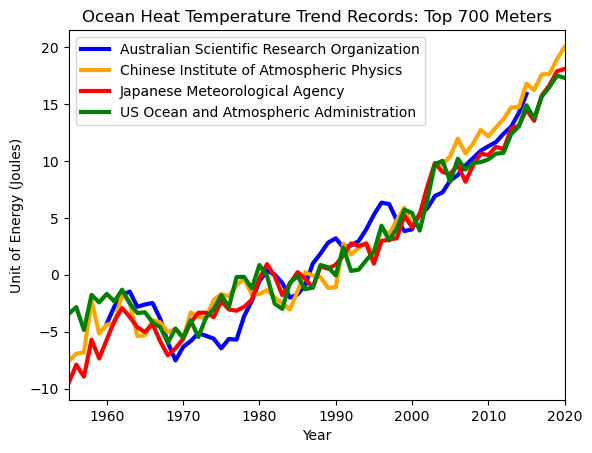

In [100]:
#reference: https://www.epa.gov/climate-indicators/climate-change-indicators-ocean-heat
#plotting ocean heat recorded by main instututions .. China, Japan, Australia, USA.
plt.figure(figsize=(12,10))
ocean_heat.plot(x='Year', y =['CSIRO', 'IAP', 'MRI/JMA', 'NOAA'], label= ['Australian Scientific Research Organization', 'Chinese Institute of Atmospheric Physics', 'Japanese Meteorological Agency', 'US Ocean and Atmospheric Administration'], linewidth = 3,color=["blue", "orange", "red", "green"])
plt.xlim([1955,2020])
plt.title('Ocean Heat Temperature Trend Records: Top 700 Meters')
plt.ylabel('Unit of Energy (Joules)',fontsize=10)
plt.savefig('ocean_heat_temp.png')

In [101]:
#Importing Ocean acidity .. need to filter info for only pacific ocean as it's the only relevant info here.. 
sea_acid = pd.read_csv('ocean-acidity.csv', nrows=299)
sea_acid = sea_acid.rename(columns={'Hawaii Year': 'hawaii_year', 'Hawaii pH': 'hawaii_ph', 'Hawaii pCO2' : 'hawaii_pco2'})
sea_acid.head()

,hawaii_year,hawaii_ph,hawaii_pco2,Unnamed: 3,Canary Islands Year,Canary Islands pH,Canary Islands pCO2,Unnamed: 7,Bermuda Year,Bermuda pH,Bermuda pCO2,Unnamed: 11,Cariaco Year (pH),Cariaco pH,Cariaco Year (pCO2),Cariaco pCO2
0,1989,8.1097,330.9,NaN,1995.7507,8.0765,377.6526,NaN,1983.6959,8.070,363.187,NaN,1995.950685,8.0597,1995.950685,400.925986
1,1989,8.1092,330.6,NaN,1995.7562,8.0743,380.0385,NaN,1983.7726,8.088,343.941,NaN,1996.032787,8.0603,1996.032787,388.131890
2,1989,8.1168,324.3,NaN,1995.7644,8.0713,383.1138,NaN,1984.0712,8.146,299.199,NaN,1996.120219,8.0690,1996.120219,375.392151
3,1989,8.1316,310.9,NaN,1995.9014,8.0837,370.4347,NaN,1984.1836,8.145,301.419,NaN,1996.292350,7.9921,1996.292350,443.365629
4,1989,8.1218,317.7,NaN,1996.0656,8.1117,343.0605,NaN,1984.3260,8.144,302.309,NaN,1996.355191,8.0482,1996.355191,381.591860


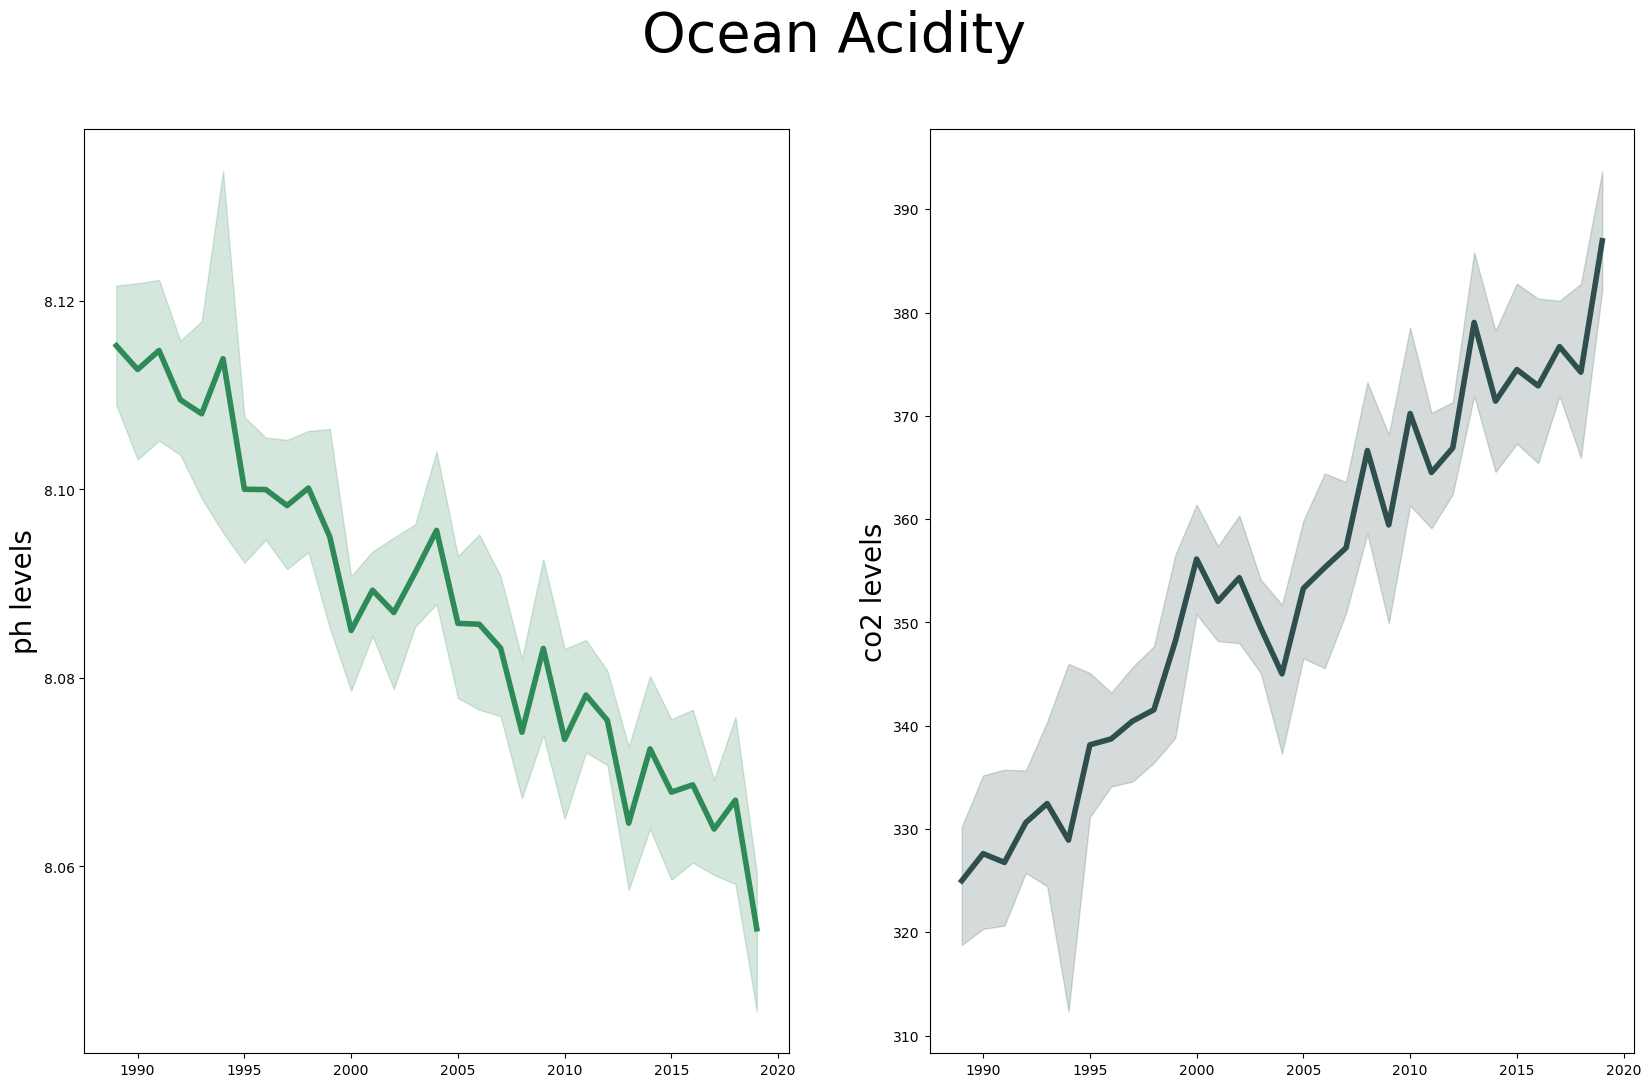

In [102]:
#reference: https://www.epa.gov/climate-indicators/climate-change-indicators-ocean-acidity
#plotting HAWAII INFO SINCE RELEVANT TO PACIFIC OCEAN
#ph levels on the decline, ever so slightly .. why?
#co2 levels on the rise due to carbon emissions
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.lineplot(x='hawaii_year',y='hawaii_ph', data=sea_acid, linewidth=4, color="seagreen").set(xlabel=None)
plt.ylabel('ph levels', fontsize=20)

plt.subplot(1,2,2)
sns.lineplot(x='hawaii_year',y='hawaii_pco2', data=sea_acid, linewidth=4, color="darkslategray").set(xlabel=None)
plt.ylabel('co2 levels', fontsize=20)

plt.suptitle('Ocean Acidity', fontsize=40)

plt.savefig('ocean_acidity.png')

WILDLIFE/ECOSYSTEMS/EXTENCTION THREAT

In [103]:
#total number of DESCRIBED SPECIES, really only using to show how relevant coral is among other living things
species_tot = pd.read_csv('number-of-described-species.csv')
species_tot= species_tot.rename(columns={'Number of described species': 'species_count'})
species_filt = species_tot[species_tot['species_count'] < 12000]
species_filt = species_filt.sort_values('species_count')
species_filt = species_filt.drop([13])
species_filt

,Entity,Code,Year,species_count
25,Velvet Worms,NaN,2020,183
12,Gymnosperms,NaN,2020,1113
5,Corals,NaN,2020,2175
4,Brown Algae,NaN,2020,4326
17,Mammals,NaN,2020,6485
23,Red Algae,NaN,2020,7331
1,Amphibians,NaN,2020,8250
3,Birds,NaN,2020,11158
24,Reptiles,NaN,2020,11341
11,Green Algae,NaN,2020,11646


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

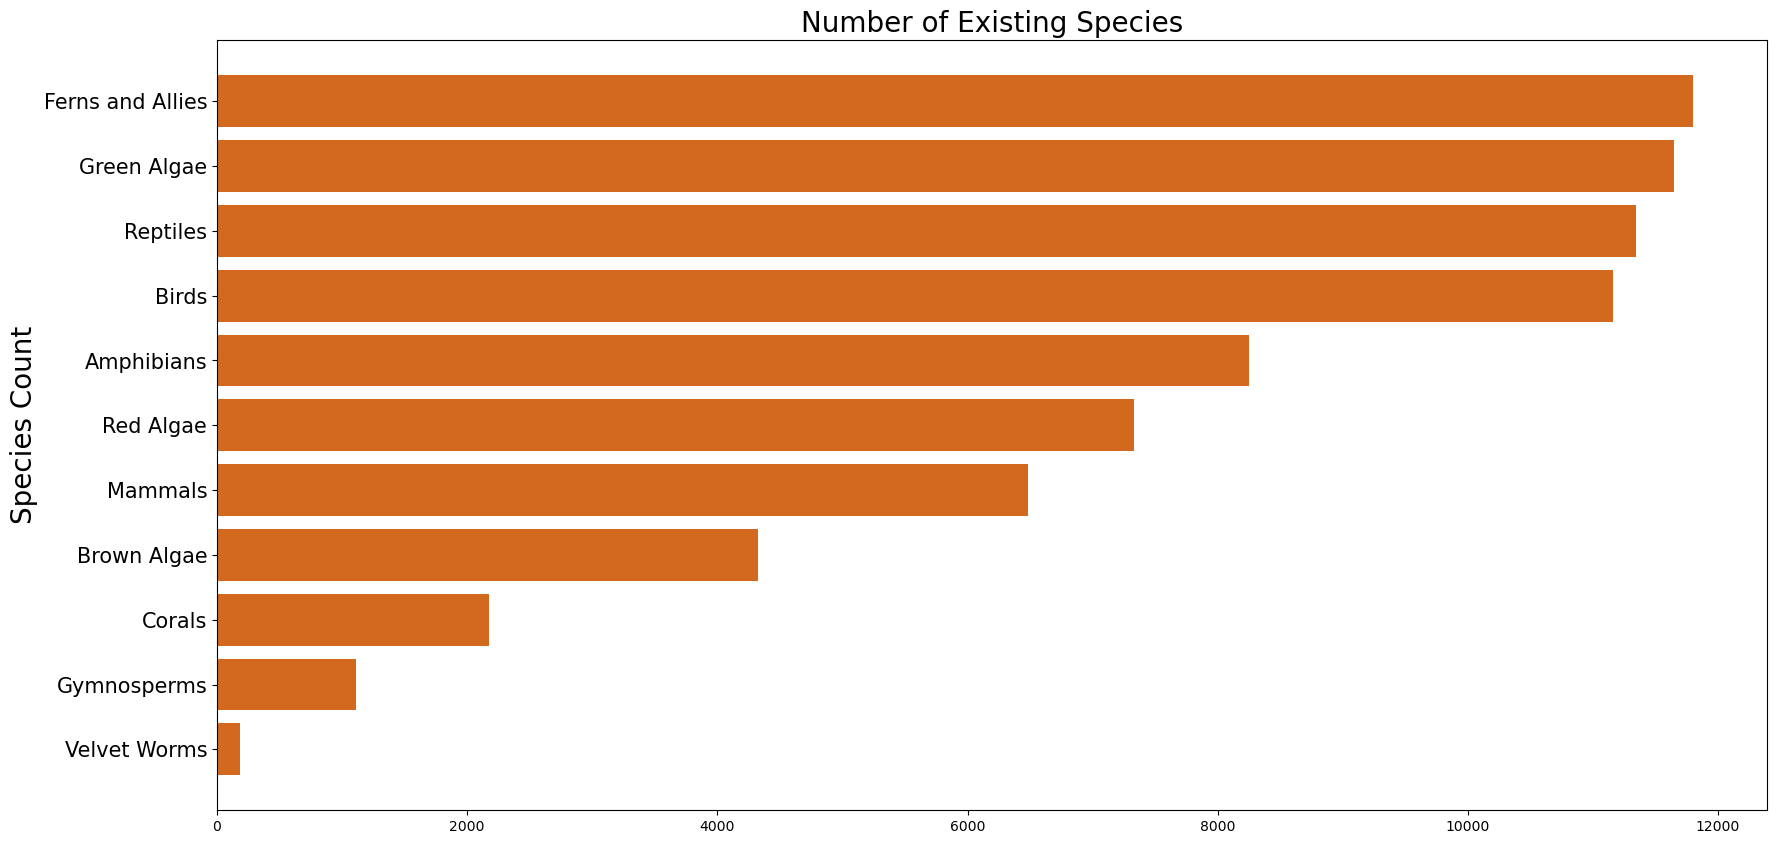

In [104]:
#plotting number of species less than 12,000 total just to give a relevant picture of corals to mammals and birds etc. 
plt.figure(figsize=(20,10))
plt.barh(species_filt.Entity, species_filt.species_count, color="chocolate")
plt.title('Number of Existing Species', fontsize=20)
plt.ylabel('Species Count',fontsize=20)

plt.yticks(fontsize = 15)

In [105]:
#total number of THREATENED SPECIES. explain why they are threated.. look into this further on OUR WORLD.
species_threat = pd.read_csv('number-species-threatened.csv')
species_threat = species_threat.rename(columns={'Number of threatened species': 'species_threatened'})
#filtering for smaller numbers of relevant threatened species closer to coral for cleaner plotting
threat_filt = species_threat[species_threat['species_threatened'] >= 148]
threat_relevant = threat_filt[threat_filt['species_threatened'] <= 742]
threat_relevant

,Entity,Code,Year,species_threatened
6,Other Invertebrates,NaN,2020,148
7,Mosses,NaN,2020,165
8,Mushrooms etc.,NaN,2020,185
9,Arachnids,NaN,2020,203
10,Corals,NaN,2020,237
11,Fungi and Protists,NaN,2020,239
12,Ferns and Allies,NaN,2020,265
13,Gymnosperms,NaN,2020,403
14,Crustaceans,NaN,2020,742


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

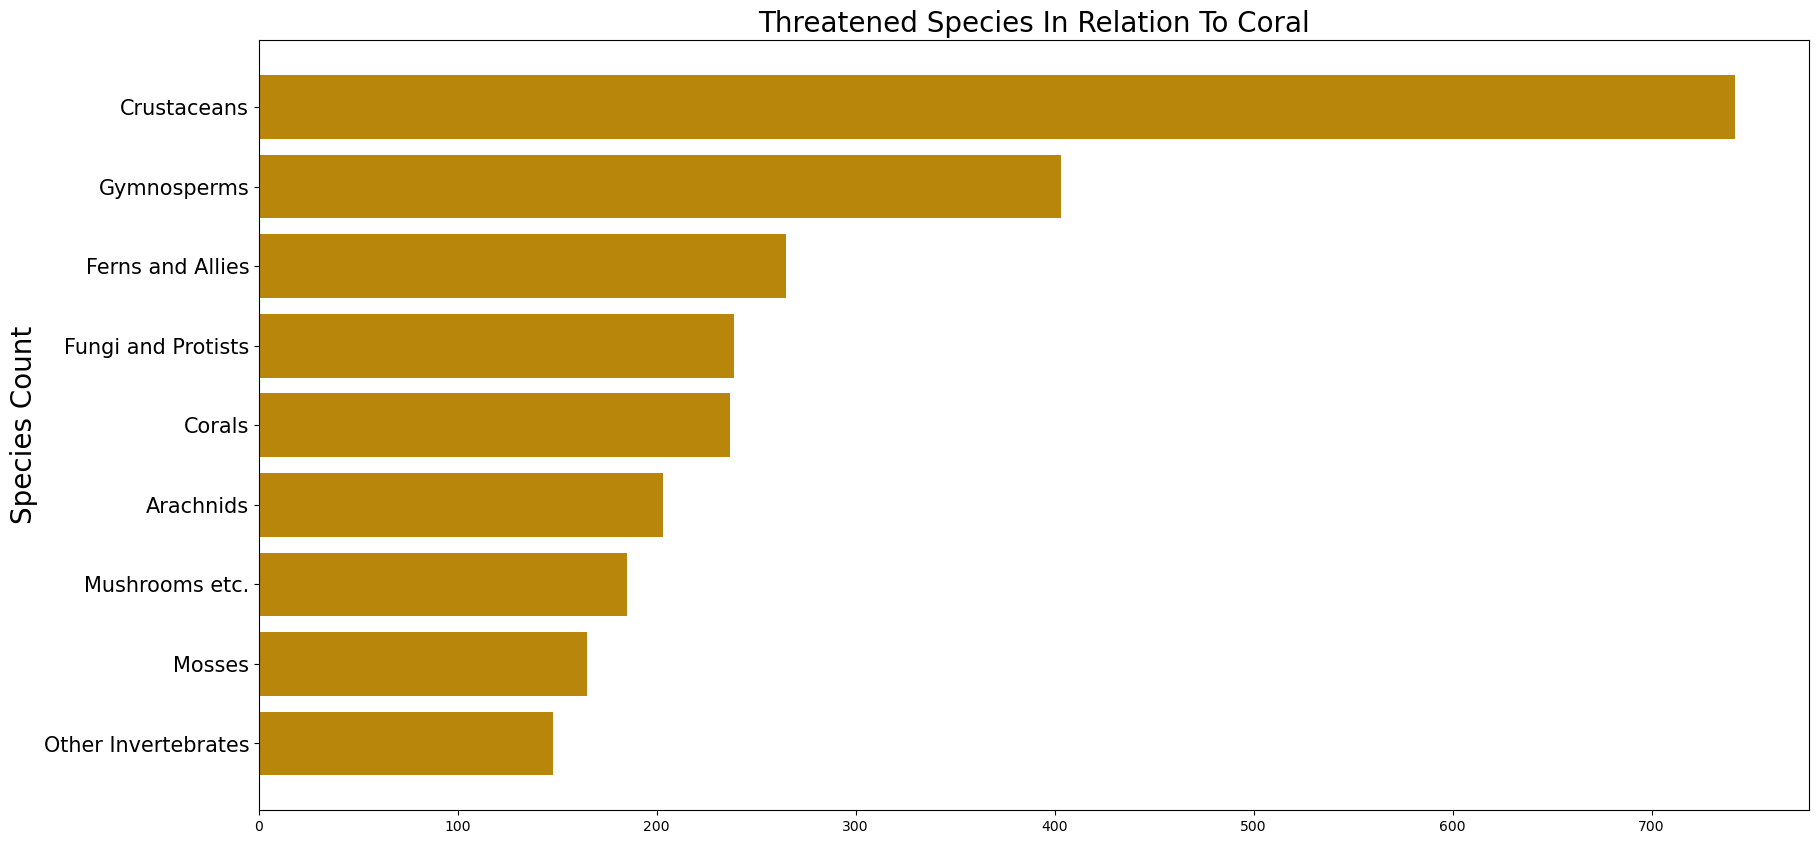

In [106]:
#plotting THREATENED SPECIES CLOSER TO THE TOTAL NUMBER OF CORAL SPECIES THREATENED
plt.figure(figsize=(20,10))
plt.barh(threat_relevant.Entity, threat_relevant.species_threatened, color="darkgoldenrod")
plt.title('Threatened Species In Relation To Coral', fontsize=20)
plt.ylabel('Species Count',fontsize=20)

plt.yticks(fontsize = 15)

In [107]:
#total number of FISH THREATENED 
fish_threat = pd.read_csv('fish-species-threatened.csv')
fish_threat = fish_threat.rename(columns={'Fish species, threatened': 'fish_threatened'})
fish_threat.head()

,Entity,Code,Year,fish_threatened
0,Afghanistan,AFG,2017,5
1,Albania,ALB,2017,44
2,Algeria,DZA,2017,40
3,American Samoa,ASM,2017,12
4,Andorra,AND,2017,0


In [108]:
#filtering for top 10 fish species threatened by country in 2017
fish_filt = fish_threat[fish_threat['fish_threatened'] >= 107]
fish_threat_top10 = fish_filt[fish_filt['fish_threatened'] <= 181]
fish_threat_top10 = fish_threat_top10.sort_values('fish_threatened', ascending=False)
fish_threat_top10

,Entity,Code,Year,fish_threatened
151,Mexico,MEX,2017,181
234,Tanzania,TZA,2017,176
109,Indonesia,IDN,2017,163
43,China,CHN,2017,134
241,Turkey,TUR,2017,131
11,Australia,AUS,2017,123
34,Cameroon,CMR,2017,121
218,South Africa,ZAF,2017,120
142,Madagascar,MDG,2017,110
235,Thailand,THA,2017,107


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

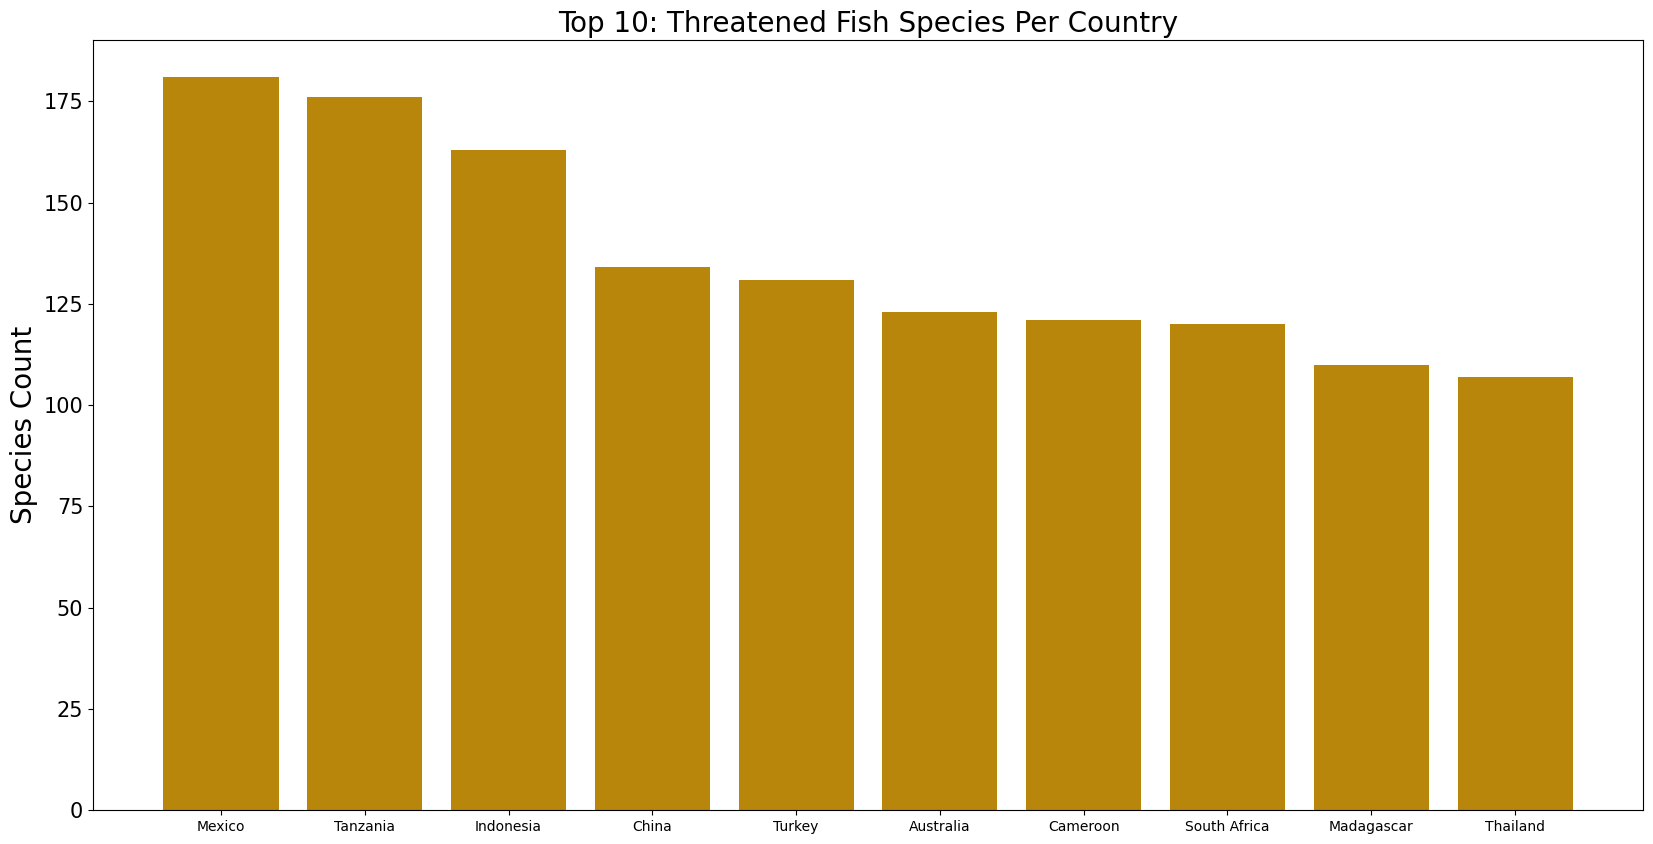

In [109]:
#plotting top 10 threatened fish species by country
plt.style.use('default')
plt.figure(figsize=(20,10))
plt.bar(fish_threat_top10.Entity, fish_threat_top10.fish_threatened, color="darkgoldenrod")
plt.title('Top 10: Threatened Fish Species Per Country', fontsize=20)
plt.ylabel('Species Count',fontsize=20)

plt.yticks(fontsize = 15)

POLLUTION

In [110]:
#importing GLOBAL CARBON BUDGET DF, per country .. try filtering specific years here to clean up a little bit
#years ranging are way too massive, find a range that coincides with other DF's to tell a story.
gcb = pd.read_csv('GCB2020v18_MtCO2_flat.csv')
gcb = gcb[['Country', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Per Capita']]
gcb_filt = gcb[gcb['Year'] == 2017]
gcb_rank = gcb_filt.sort_values('Total', ascending=False)
gcb_rank

#using this INDEX FUNCTION TO DROP "GLOBAL" FROM COUNTRIES COLUMN.
index = gcb_rank[gcb_rank['Country'] == 'Global'].index
gcb_rank.drop(index, inplace=True)
gcb_2017 = gcb_rank.head(5)
gcb_2017

,Country,Year,Total,Coal,Oil,Gas,Per Capita
10797,China,2017,9750.725978,7137.264119,1390.824562,464.452128,6.861771
58317,USA,2017,5253.606130,1337.536223,2301.966677,1491.791868,16.160727
24837,India,2017,2456.847641,1585.273921,630.028955,118.922003,1.835281
45627,Russia,2017,1646.179810,383.249474,415.075022,779.283684,11.311612
26997,Japan,2017,1187.661454,458.309051,448.322988,245.692546,9.314793


<Figure size 2000x1000 with 0 Axes>

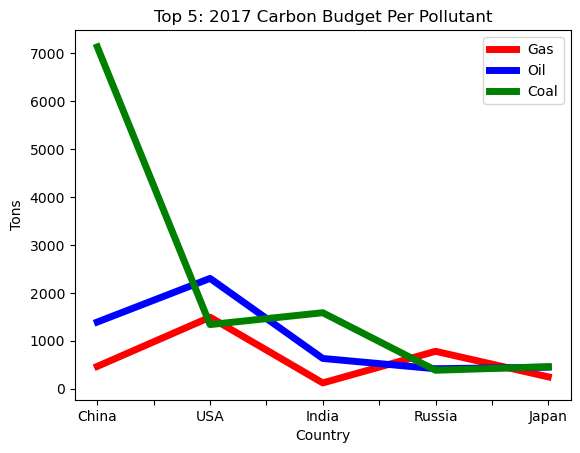

In [111]:
#plotting top carbon budget by BIG 5 countries per pollution category

plt.figure(figsize=(20,10))
gcb_2017.plot(x= 'Country', y = ['Gas', 'Oil', 'Coal'], linewidth=5, color=["red", "blue", "green"])
plt.ylabel('Tons',fontsize=10)
plt.title('Top 5: 2017 Carbon Budget Per Pollutant')
plt.savefig('budget_per_pollutant.png')

<Figure size 2000x1000 with 0 Axes>

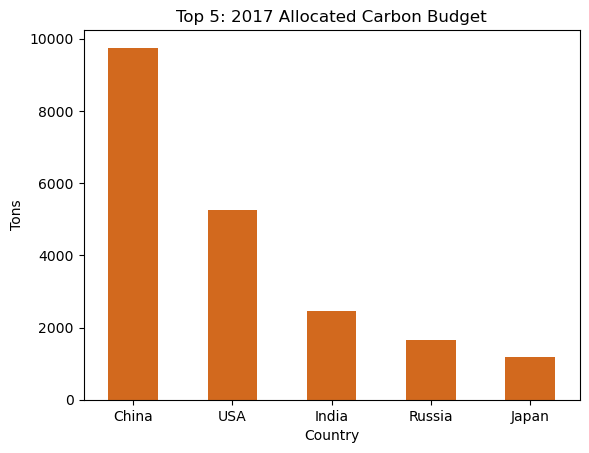

In [112]:
#plotting top carbon budget by BIG 5 countries per TOTAL BUDGET TO COMPARE TO ACTUAL C02 EMISSIONS TO SEE WHO WENT OVER BUDGET
plt.figure(figsize=(20,10))
gcb_2017.plot(x= 'Country', y = ['Total'], linewidth=5, kind='bar', legend=None, color="chocolate")
plt.ylabel('Tons',fontsize=10)
plt.title('Top 5: 2017 Allocated Carbon Budget')
plt.xticks(rotation = 0)
plt.savefig('carbon_budget_2017.png')

In [113]:
#importing global plastics PRODUCTION
plastics = pd.read_csv('global-plastics-production.csv')
plastics = plastics.rename(columns={'Global plastics production (million tonnes)': 'plastic_prod_total'})

#dividing plastics production per millon tons by 1 Million since plotting billions on y axis was causing plotting errors.
plastics['plastic_prod_total'] = plastics['plastic_prod_total']/1000000
plastics

,Entity,Code,Year,plastic_prod_total
0,World,OWID_WRL,1950,2.0
1,World,OWID_WRL,1951,2.0
2,World,OWID_WRL,1952,2.0
3,World,OWID_WRL,1953,3.0
4,World,OWID_WRL,1954,3.0
...,...,...,...,...
61,World,OWID_WRL,2011,325.0
62,World,OWID_WRL,2012,338.0
63,World,OWID_WRL,2013,352.0
64,World,OWID_WRL,2014,367.0


<Figure size 2000x1000 with 0 Axes>

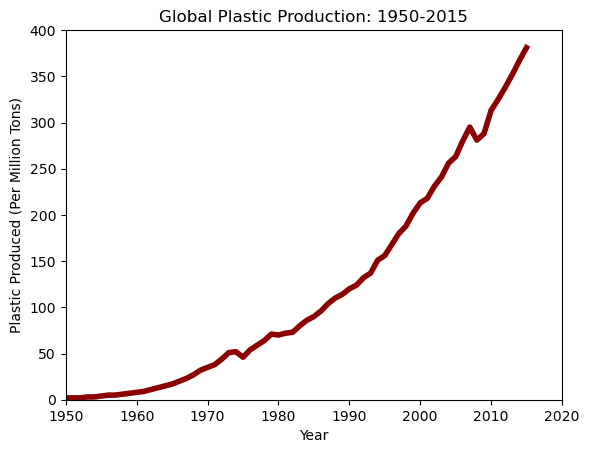

In [114]:
plt.figure(figsize=(20,10))
plastics.plot(x= 'Year', y = ['plastic_prod_total'], color='darkred', linewidth=4, legend=None)
plt.title('Global Plastic Production: 1950-2015')
plt.ylabel('Plastic Produced (Per Million Tons)', fontsize=10)
plt.ylim([0,400])
plt.xlim([1950, 2020])
plt.savefig('global_plastic_prod.png')

In [115]:
#attempting to add geojson for global carbon budget.


In [116]:
#attempting webscrape for carbon emissions 2017
website_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions'
response = requests.get(website_url)

response.status_code

200

In [117]:
emissions = BeautifulSoup(response.content, 'lxml')
print(emissions.title)

<title>List of countries by carbon dioxide emissions - Wikipedia</title>


In [118]:
print(emissions)

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by carbon dioxide emissions - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"54234f37-9080-4f34-90a0-cced97d2ea07","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_carbon_dioxide_emissions","wgTitle":"List of countries by carbon dioxide emissions","wgCurRevisionId":1027088817,"wgRevisionId":1027088817,"wgArticleId":1716015,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","

In [119]:
tables = emissions.find_all('table', attrs = {'class': 'wikitable sortable'})
tables

[<table class="wikitable sortable" style="text-align:right">
 <tbody><tr>
 <th rowspan="2" width="220pt">Country<sup class="reference" id="cite_ref-EU_SCIENCE_HUB_18-0"><a href="#cite_note-EU_SCIENCE_HUB-18">[18]</a></sup>
 </th>
 <th colspan="3">Fossil <span class="nowrap"><span class="chemf nowrap">CO<span style="display:inline-block; margin-bottom:-0.3em; vertical-align:-0.4em; line-height:1.2em; font-size:70%; text-align:left;"><br/>2</span></span></span> emissions<br/>(Mt <span class="nowrap"><span class="chemf nowrap">CO<span style="display:inline-block; margin-bottom:-0.3em; vertical-align:-0.4em; line-height:1.2em; font-size:70%; text-align:left;"><br/>2</span></span></span>)
 </th>
 <th colspan="2">Fossil <span class="nowrap"><span class="chemf nowrap">CO<span style="display:inline-block; margin-bottom:-0.3em; vertical-align:-0.4em; line-height:1.2em; font-size:70%; text-align:left;"><br/>2</span></span></span> emissions
 </th>
 <th colspan="2">2017 – Fossil <span class="nowra

In [120]:
result_list = pd.read_html(str(tables[0])) # a list of dataframes
len(result_list)

1

In [121]:
# reference: https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions
emissions_final = result_list[0]  # get the first df from the list
emissions_final = emissions_final.rename(columns= {'Country[18]' : 'Country'})
#dropping a header level after scraping table from wiki
emissions_final.columns = emissions_final.columns.droplevel(1)
#using iloc via column indexing to pull out 2 relevant columns
#this is extrememly efficient when needing small number of data from a very large dataframe without doing too much extra work or dropping etc .. 
emissions_final = emissions_final.iloc[: , [0, 3]]
emissions_final = emissions_final.rename(columns={'Fossil CO2 emissions(Mt CO2)' : 'total_emissions_2017'})


emissions_final = emissions_final.sort_values('total_emissions_2017', ascending=False)
emissions_final
#next class try to drop WORLD AND EUROPEAN UNION FROM COUNTRY COLUMN

#using this drop FUNCTION BY INDEX TO DROP "EU" AND "WORLD" FROM COUNTRIES COLUMN.
emissions_final = emissions_final.drop([0,67])
emissions_final = emissions_final.head()


<Figure size 2000x1000 with 0 Axes>

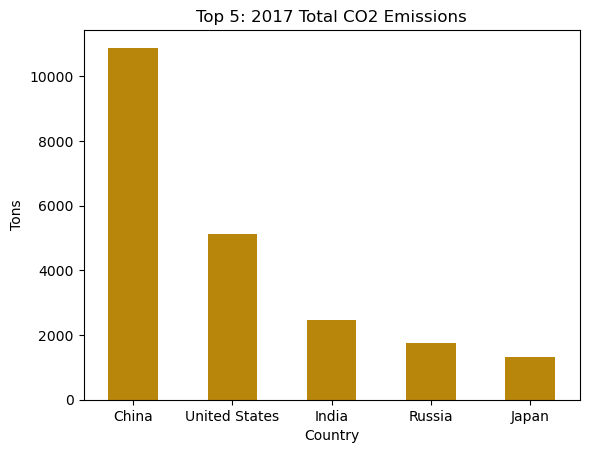

In [122]:
plt.figure(figsize=(20,10))
emissions_final.plot(x= 'Country', y = ['total_emissions_2017'], linewidth=5, kind='bar', legend=None, color="darkgoldenrod")
plt.title('Top 5: 2017 Total CO2 Emissions')
plt.ylabel('Tons',fontsize=10)
plt.xticks(rotation = 0)
plt.savefig('carbon_emissions_2017.png')

ANDREWS ORIGINAL CODE FOR RESETTING HEADER INDEXES ETC FROM A READ FILE .. 

In [123]:
# gend_data = pd.read_excel("data/gender_age.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
# gend_data = gend_data[gend_data.columns.drop(list(gend_data.filter(regex='Error')))]
# gend_data.columns = gend_data.columns.droplevel(1)
# gend_data = gend_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)
